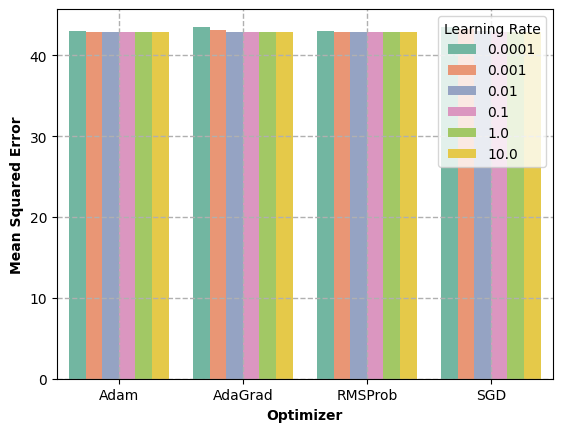

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

#sns.set_theme(rc={'figure.figsize':(15/2.54,8/2.54)})

# Load the data
df = pd.read_csv('optimizer_scan.csv')

df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.adam.Adam'>", 'Adam')
df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.adagrad.Adagrad'>", 'AdaGrad')
df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.rmsprop.RMSprop'>", 'RMSProb')
df['optimizer'] = df['optimizer'].replace("<class 'keras.src.optimizers.sgd.SGD'>", 'SGD')

#filtered = df.query('lr < 1')
metrics = ['mean_squared_error', 'mean_absolute_error']
#print(filtered)

g = sns.barplot(data=df, x='optimizer', y='mean_absolute_error', hue='lr', palette='Set2')
plt.ylabel('Mean Squared Error', fontweight='bold')
plt.xlabel('Optimizer', fontweight='bold')
g.legend(title='Learning Rate')
g.grid(True, which='both', linestyle='--', linewidth=1)

plt.savefig('optimizer_selection.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()

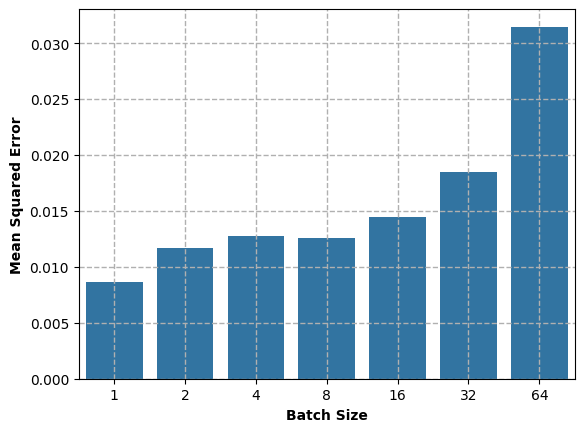

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

#sns.set_theme(rc={'figure.figsize':(15/2.54,8/2.54)})

# Load the data
df = pd.read_csv('batch_size.csv')

g = sns.barplot(data=df, x='batch_size', y='mean_squared_error')
plt.ylabel('Mean Squared Error', fontweight='bold')
plt.xlabel('Batch Size', fontweight='bold')
g.grid(True, which='both', linestyle='--', linewidth=1)

plt.savefig('batchsize_selection.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()